# Análisis Exploratorio de Datos (EDA) y su Impacto en Modelos de Regresión Lineal

En este notebook, exploraremos cómo un análisis exploratorio de datos (EDA) detallado puede mejorar significativamente la toma de decisiones y el rendimiento de modelos predictivos, específicamente la regresión lineal.

Veremos paso a paso cómo identificar y tratar:
- Datos atípicos (outliers)
- Correlaciones fuertes entre variables
- Distribuciones no normales
- Variables irrelevantes

Y cómo estas acciones impactan directamente en las métricas de rendimiento de nuestros modelos.

## 1. Configuración del Entorno y Carga de Datos  

Primero, importamos las bibliotecas necesarias y cargamos un conjunto de datos para nuestro análisis.  

Utilizaremos el **conjunto de datos de precios de viviendas de Boston**, que contiene **506 observaciones** y **14 variables**:  

- **Variable objetivo (y):** `MEDV` → Valor medio de las viviendas (en miles de dólares).  
- **Variables predictoras (X):**  
  - `CRIM`: Tasa de criminalidad per cápita por ciudad.  
  - `ZN`: Proporción de terrenos residenciales destinados a lotes grandes.  
  - `INDUS`: Proporción de acres comerciales no minoristas.  
  - `CHAS`: Variable ficticia (1 si el tramo limita con el río Charles; 0 en caso contrario).  
  - `NOX`: Concentración de óxidos de nitrógeno (ppm).  
  - `RM`: Número promedio de habitaciones por vivienda.  
  - `AGE`: Proporción de viviendas ocupadas construidas antes de 1940.  
  - `DIS`: Distancias ponderadas a cinco centros de empleo de Boston.  
  - `RAD`: Índice de accesibilidad a autopistas radiales.  
  - `TAX`: Tasa de impuestos a la propiedad por cada \$10,000.  
  - `PTRATIO`: Ratio alumno-profesor por localidad.  
  - `B`: 1000(Bk − 0.63)², donde Bk es la proporción de residentes afroamericanos.  
  - `LSTAT`: % de población con bajo nivel socioeconómico.  

Este dataset se usa como ejemplo clásico en problemas de **regresión lineal** para predecir precios de viviendas en función de características sociales, económicas y ambientales.



In [16]:
# Importar bibliotecas necesarias
import numpy as np              # Librería para manejo de arreglos y operaciones matemáticas
import pandas as pd             # Librería para manipulación de datos en DataFrames y Series

from sklearn.model_selection import train_test_split     # Para dividir los datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression        # Modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Métricas de evaluación
from sklearn.preprocessing import StandardScaler         # Para estandarizar variables numéricas

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')       # Evita que salgan advertencias en consola al ejecutar

# Cargar el conjunto de datos de Boston
try:
    url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
    df = pd.read_csv(url)             # Se carga el CSV en un DataFrame
    X = df.drop(['medv', 'b', 'lstat'], axis=1)  # Quitamos medv (target) y las columnas 'b' y 'lstat'
    y = df['medv']                    # Variable objetivo (precios de las casas)
except Exception as e:
    print(f"Error loading data from URL: {e}")
    X = None
    y = None

# Validación final: muestra información si los datos se cargaron correctamente
if X is not None and y is not None:
    print(f"Dimensiones del conjunto de datos: {X.shape}")
    print("\nPrimeras 5 filas (sin columnas 'b' ni 'lstat'):")
    print(X.head())
    print("\nEstadísticas descriptivas de la variable objetivo:")
    print(y.describe())
else:
    print("\nFailed to load the dataset.")




Dimensiones del conjunto de datos: (506, 11)

Primeras 5 filas (sin columnas 'b' ni 'lstat'):
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7

Estadísticas descriptivas de la variable objetivo:
count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64


## 📊 Interpretación de las estadísticas descriptivas de `medv`

La variable `medv` representa el **valor medio de las viviendas** en miles de dólares.  

### 🔹 Resultados obtenidos
- **count = 506**  
  Hay **506 registros** de viviendas → es el tamaño de la muestra con la que trabajaremos.  

- **mean = 22.53**  
  El **precio promedio** de las viviendas es **22,530 USD**.  
  ➡️ Sirve para tener una referencia del valor típico del mercado.  

- **std = 9.19**  
  La **variabilidad** es alta: los precios se desvían en promedio unos **9,190 USD** del valor medio.  
  ➡️ Sirve para saber si los precios son homogéneos o si hay mucha dispersión.  

- **min = 5.0**  
  El precio más bajo es de **5,000 USD**.  
  ➡️ Sirve para identificar el límite inferior del mercado y posibles casos atípicos (barrios muy baratos).  

- **25% (Q1) = 17.02**  
  El **25% de las viviendas** valen menos de **17,020 USD**.  
  ➡️ Sirve para ver el segmento de precios más bajos y comparar desigualdades.  

- **50% (mediana) = 21.20**  
  La mitad de las viviendas cuestan **21,200 USD o menos**.  
  ➡️ Sirve para describir el “precio típico” sin que influyan valores extremos.  

- **75% (Q3) = 25.0**  
  El **75% de las viviendas** tienen un precio menor o igual a **25,000 USD**.  
  ➡️ Sirve para entender dónde está concentrada la mayoría del mercado.  

- **max = 50.0**  
  El máximo es de **50,000 USD**, pero este valor está **censurado** en el dataset.  
  ➡️ Sirve para reconocer una limitación del dataset (muchos valores topeados en 50).  

---

### 🔹 ¿Para qué sirve este análisis?

1. **Entender el mercado representado en el dataset:**  
   La mayoría de las casas están en un rango entre **17,000 y 25,000 USD**.  

2. **Detectar dispersión y desigualdad:**  
   Con una desviación estándar de **9,190 USD**, los precios varían bastante entre barrios.  

3. **Identificar casos extremos:**  
   Hay viviendas muy baratas (5,000 USD) y un grupo artificialmente truncado en 50,000 USD → esto afecta modelos de predicción.  

4. **Soporte para Machine Learning:**  
   - Ayuda a decidir si conviene **escalar variables**.  
   - Advierte sobre la existencia de **outliers**.  
   - Permite diseñar métricas y gráficos para comparar con los resultados de los modelos.  

---

✅ **Conclusión:**  
El dataset muestra un mercado de viviendas mayormente concentrado en el rango **17–25 mil dólares**, con bastante variabilidad y un tope artificial de **50 mil dólares**. Estas estadísticas son la base para tomar decisiones de preprocesamiento y para evaluar si los modelos de regresión capturan bien la tendencia de los precios.


## 2. Análisis Exploratorio de Datos (EDA)

El EDA es un paso crucial antes de construir cualquier modelo. Nos permite entender la estructura de los datos, identificar patrones, detectar anomalías y descubrir relaciones entre variables.

### 2.1 Análisis Univariado: Distribución de Variables

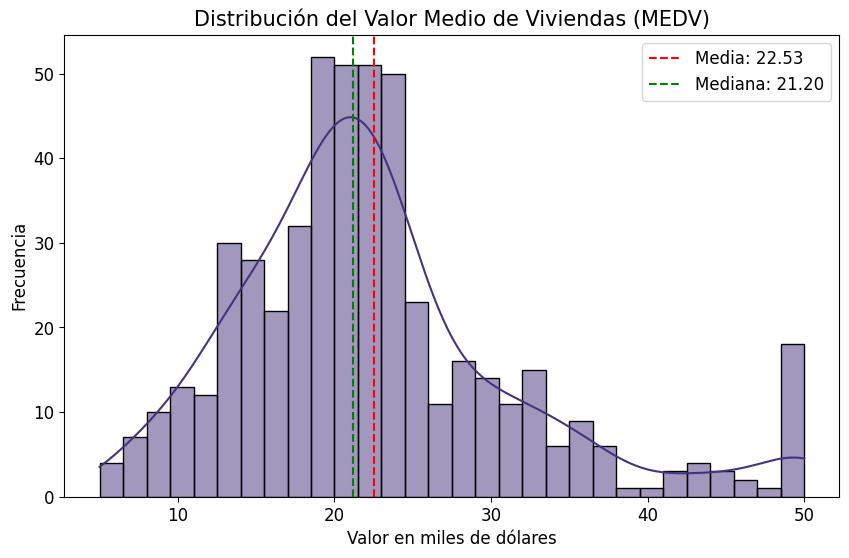

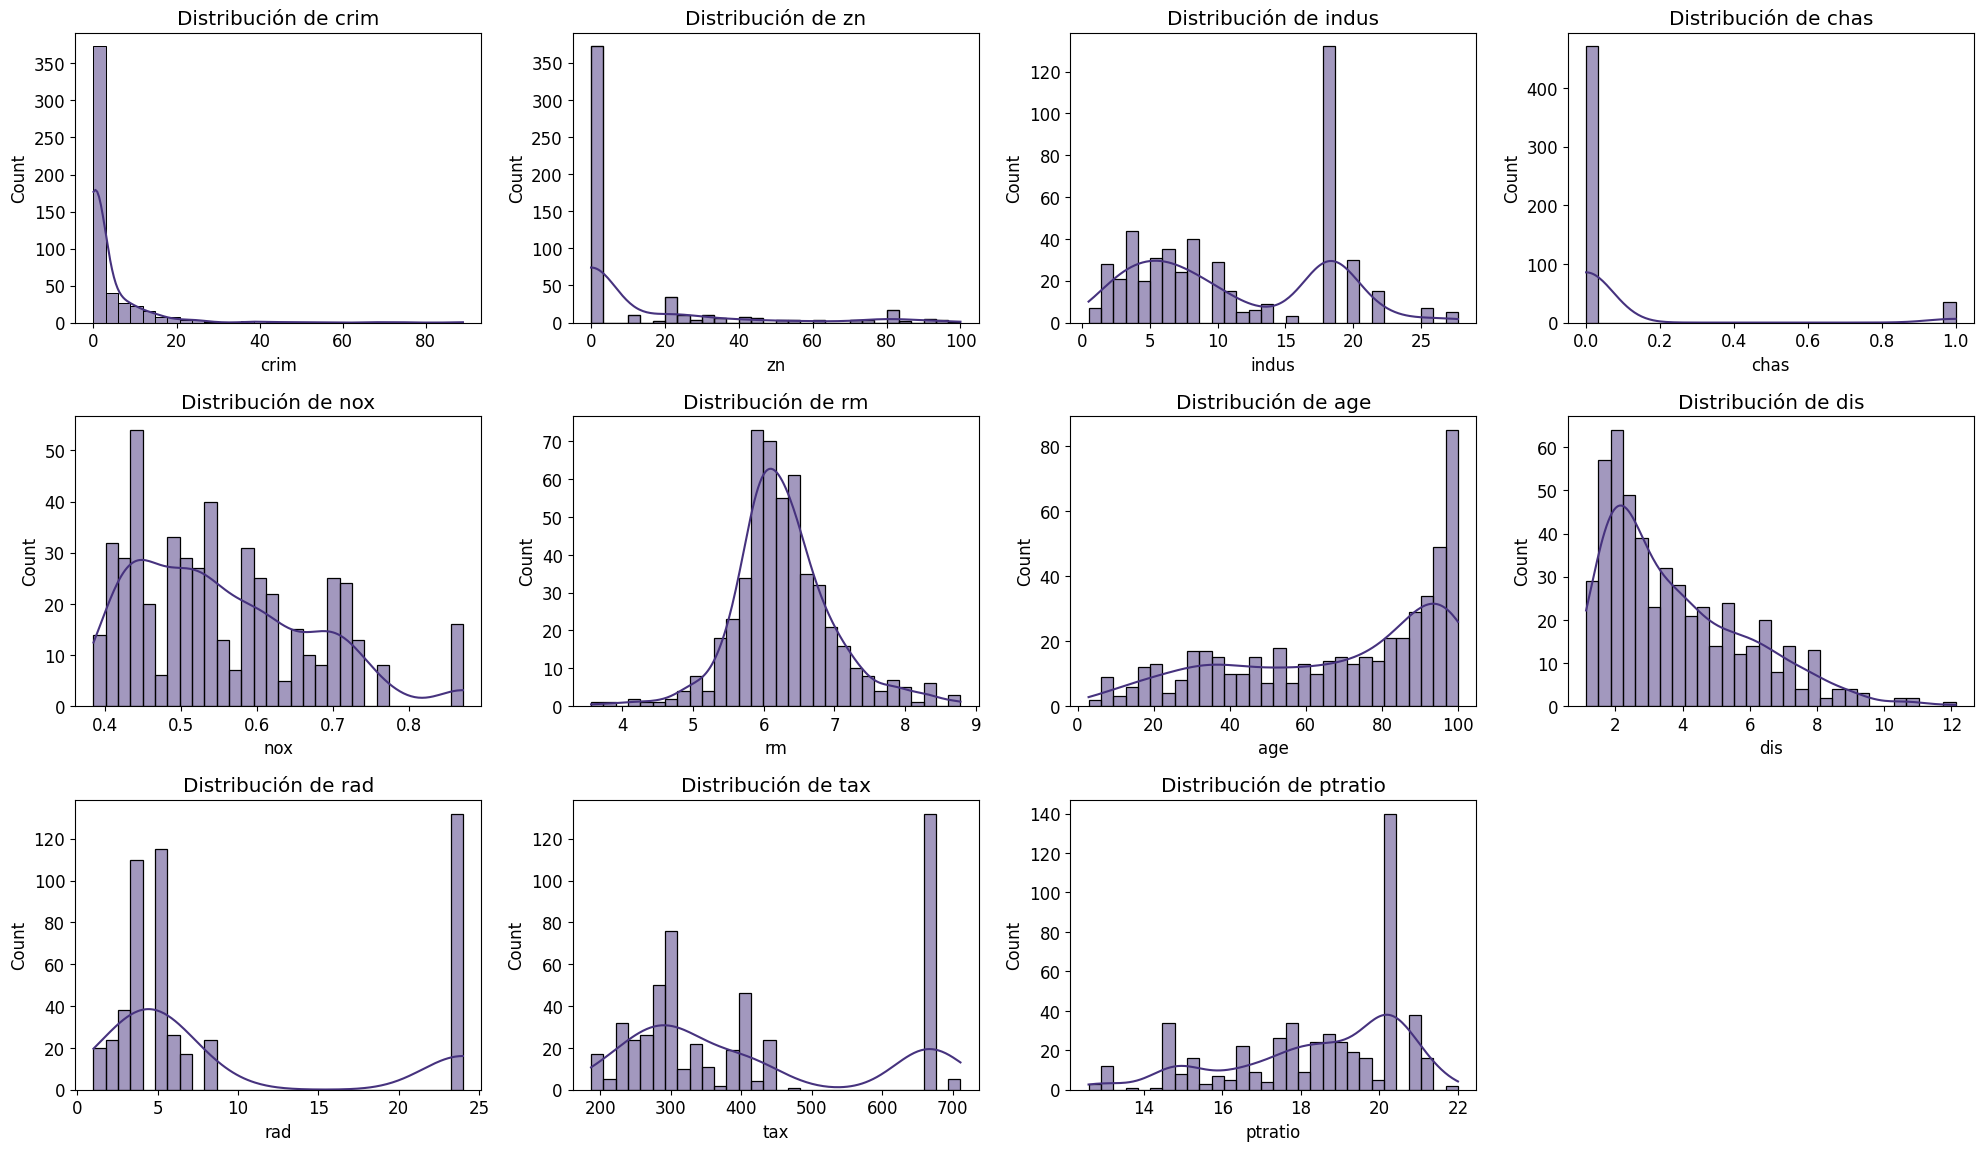

Variables con mayor asimetría (skewness):
crim    5.223149
chas    3.405904
zn      2.225666
MEDV    1.108098
dis     1.011781
dtype: float64

Variables con mayor curtosis:
crim    37.130509
chas     9.638264
zn       4.031510
rm       1.891500
MEDV     1.495197
dtype: float64


In [17]:
# Crear un DataFrame combinado para facilitar el análisis
df = X.copy()             # Copiamos las variables predictoras (X) en un nuevo DataFrame
df['MEDV'] = y            # Añadimos la variable objetivo (precio medio de viviendas) al DataFrame

# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(10, 6))  # Definimos el tamaño de la figura (ancho=10, alto=6)
sns.histplot(df['MEDV'], kde=True, bins=30)  # Histograma de MEDV con curva de densidad (kde) y 30 bins
plt.title('Distribución del Valor Medio de Viviendas (MEDV)', fontsize=15)  # Título del gráfico
plt.xlabel('Valor en miles de dólares')  # Etiqueta del eje X
plt.ylabel('Frecuencia')                 # Etiqueta del eje Y
plt.axvline(df['MEDV'].mean(), color='red', linestyle='--',
            label=f'Media: {df["MEDV"].mean():.2f}')  # Línea vertical en la media
plt.axvline(df['MEDV'].median(), color='green', linestyle='--',
            label=f'Mediana: {df["MEDV"].median():.2f}')  # Línea vertical en la mediana
plt.legend()  # Muestra la leyenda con media y mediana
plt.show()    # Renderiza el gráfico

# Visualizar la distribución de todas las variables predictoras
plt.figure(figsize=(20, 15))  # Crea una figura grande para múltiples subgráficos
for i, column in enumerate(X.columns, 1):    # Itera por todas las columnas de X, enumerándolas desde 1
    plt.subplot(4, 4, i)                     # Crea una grilla de subplots (4 filas x 4 columnas)
    sns.histplot(df[column], kde=True, bins=30)   # Histograma con curva de densidad de cada variable
    plt.title(f'Distribución de {column}')   # Título de cada subplot con el nombre de la variable
    plt.tight_layout()                       # Ajusta los subplots para que no se solapen
plt.show()                                   # Renderiza todos los gráficos de las variables predictoras

# Análisis de asimetría (skewness) y curtosis
skewness = df.skew().sort_values(ascending=False)     # Calcula la asimetría de cada variable y ordena descendente
kurtosis = df.kurtosis().sort_values(ascending=False) # Calcula la curtosis de cada variable y ordena descendente

print("Variables con mayor asimetría (skewness):")  # Skewness indica si la distribución está sesgada a un lado
print(skewness.head(5))                             # Muestra las 5 variables más sesgadas
print("\nVariables con mayor curtosis:")            # Curtosis mide "apuntamiento" (colas pesadas o ligeras)
print(kurtosis.head(5))                             # Muestra las 5 variables con mayor curtosis


## 📊 Mitigación de problemas en las distribuciones

| Variable  | Problema detectado | Posible mitigación |
|-----------|-------------------|--------------------|
| **CRIM** (criminalidad) | Muy sesgada a la derecha, outliers grandes. | Aplicar **transformación logarítmica** o raíz cuadrada para reducir el efecto de los valores extremos. |
| **ZN** (zonificación) | Casi todos los valores son 0, con pocos muy altos → variable muy desbalanceada. | Tratarla como **variable categórica binaria** (0 = sin zonificación, 1 = con zonificación). Alternativamente, aplicar **binarización**. |
| **INDUS** (zonas industriales) | Distribución multimodal, con picos en valores específicos. | No requiere transformación; se puede normalizar para escalarla en el modelo. |
| **CHAS** (cerca del río) | Variable dummy (0/1). | Dejar como está; es una **categórica binaria**. |
| **NOX** (contaminación) | Ligera asimetría. | Normalizar o estandarizar; opcionalmente aplicar transformación log. |
| **RM** (habitaciones) | Casi normal, pocos outliers > 8. | Se puede dejar como está, pero revisar outliers extremos. |
| **AGE** (% casas antiguas) | Sesgada a la izquierda, muchos valores cercanos a 100. | Escalar con **MinMaxScaler** o aplicar transformación log(101–AGE) para balancear. |
| **DIS** (distancia a centros) | Muy sesgada a la derecha. | Aplicar **logaritmo** para reducir la cola larga. |
| **RAD** (acceso autopistas) | Variable discreta con picos → casi categórica. | Tratar como **ordinal/categórica** o usar **one-hot encoding** si es necesario. |
| **TAX** (impuestos) | Multimodal, con concentraciones en valores específicos. | Escalar (StandardScaler). Opcional: tratar como categórica si refleja tramos de impuestos. |
| **PTRATIO** (relación alumnos/profesor) | Distribución discreta con varios picos. | Escalar. Puede dejarse como continua, aunque en algunos contextos se considera **categórica ordinal**. |

---

## ✅ Conclusión
- **Variables muy sesgadas** (`CRIM`, `ZN`, `DIS`, `AGE`) → aplicar transformaciones (log, raíz cuadrada) o recodificación.  
- **Variables discretas/categóricas** (`CHAS`, `RAD`, `PTRATIO`) → tratarlas como categóricas (dummy/ordinal).  
- **Variables casi normales** (`RM`, `NOX`) → basta con escalarlas.  
- **Multimodales (`TAX`, `INDUS`)** → no necesitan transformación, solo escalado.  

Estas mitigaciones hacen que los modelos lineales (ej: **Regresión Lineal, Regresión Logística**) sean más robustos y que las variables no dominen por diferencias de escala o sesgo.


### Interpretación del Análisis Univariado

El análisis univariado nos permite entender la distribución de cada variable individualmente:

1. **Distribución de la variable objetivo (MEDV)**:
   - Observamos si sigue una distribución normal o si está sesgada
   - Identificamos posibles valores atípicos en los precios de las viviendas
   - La diferencia entre media y mediana nos indica el grado de asimetría

2. **Distribución de variables predictoras**:
   - Variables con distribución normal son ideales para modelos lineales
   - Variables con alta asimetría pueden necesitar transformaciones
   - Variables con distribuciones multimodales pueden indicar subpoblaciones

3. **Asimetría y curtosis**:
   - Alta asimetría positiva: cola larga hacia la derecha
   - Alta asimetría negativa: cola larga hacia la izquierda
   - Alta curtosis: distribución con colas pesadas (más valores extremos)

Estos hallazgos son cruciales para decidir qué transformaciones aplicar a nuestros datos antes de modelar.

### 2.2 Detección de Valores Atípicos (Outliers)

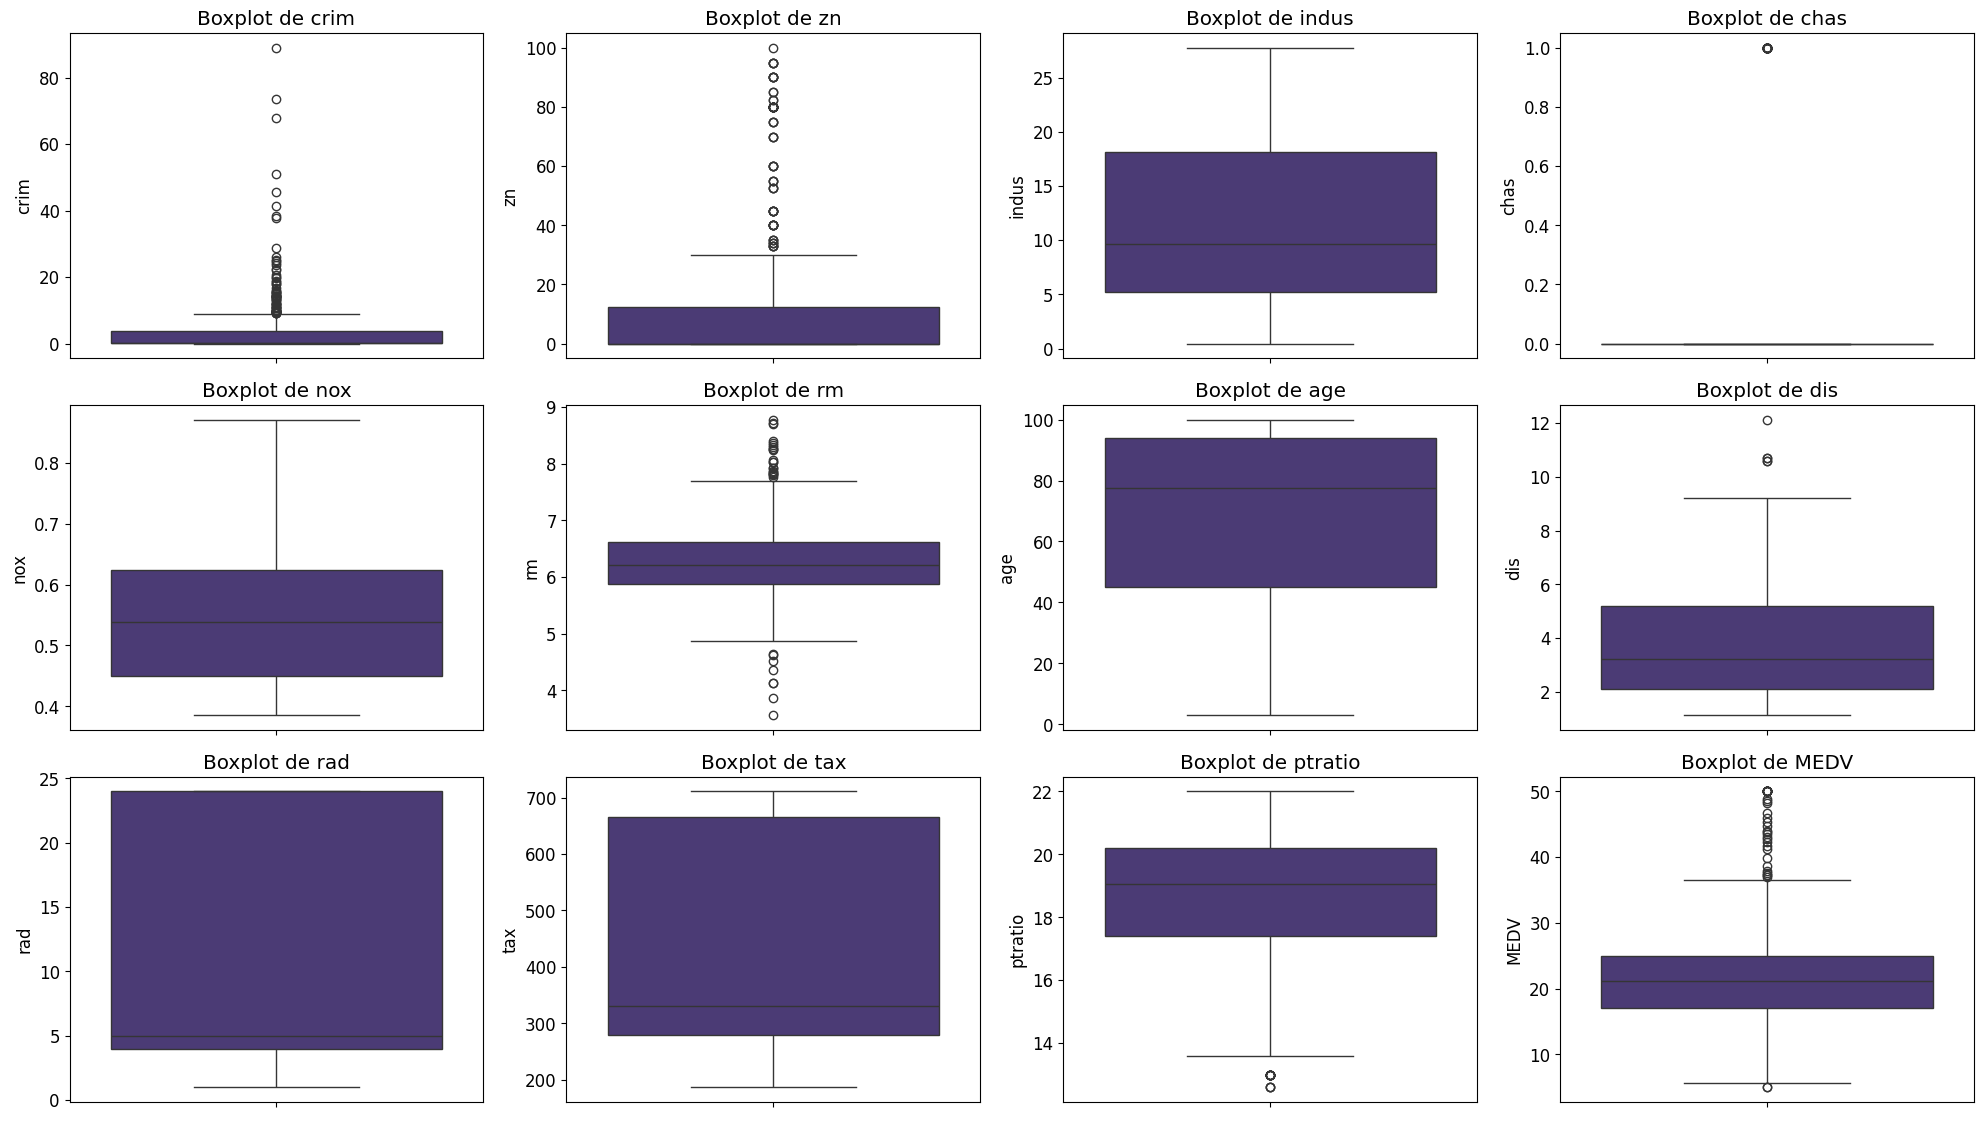

In [19]:
# ================================================================
# Detección de outliers en el dataset Boston Housing
# ================================================================

# 1. Boxplots para visualizar outliers en todas las variables
plt.figure(figsize=(20, 15))               # Define el tamaño de la figura
for i, column in enumerate(df.columns, 1): # Itera sobre todas las columnas del DataFrame df
    plt.subplot(4, 4, i)                   # Crea una grilla de 4x4 subplots
    sns.boxplot(y=df[column])              # Dibuja un boxplot de la variable actual
    plt.title(f'Boxplot de {column}')      # Título del gráfico
    plt.tight_layout()                     # Ajusta el espaciado para evitar solapamientos
plt.show()                                 # Renderiza todos los boxplots
# -> Los boxplots permiten ver visualmente qué valores se salen del rango normal (outliers).

# 2. Función para identificar outliers con la regla del IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)         # Primer cuartil (25% de los datos)
    Q3 = df[column].quantile(0.75)         # Tercer cuartil (75% de los datos)
    IQR = Q3 - Q1                          # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR           # Límite inferior para detectar valores bajos extremos
    upper_bound = Q3 + 1.5 * IQR           # Límite superior para detectar valores altos extremos
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
# -> Esta función aplica la fórmula estándar de IQR para marcar outliers.

# 3. Selección de variables clave para el análisis
key_variables = [var for var in ['LSTAT', 'RM', 'MEDV'] if var in df.columns]
# -> Solo se incluyen estas columnas si realmente existen en el DataFrame.


# ================================================================
# Conclusión:
# Este bloque detecta outliers de dos maneras:
# (1) Visualmente con boxplots.
# (2) Numéricamente usando la regla del IQR.
# Esto permite decidir si se eliminan, transforman o se mantienen
# según el contexto del análisis.
# ================================================================


## 📌 Resumen: Qué muestran los boxplots y cómo actuar

- **CRIM (criminalidad):** hay barrios con criminalidad muy alta → aplicar logaritmo para reducir el efecto de extremos.  
- **ZN (zonificación):** casi siempre es 0, solo algunos valores grandes → mejor convertir en variable binaria (0 = no, 1 = sí).  
- **INDUS (zonas industriales):** distribución estable → solo necesita escalado.  
- **CHAS (río Charles):** variable binaria (0 o 1) → se deja tal cual.  
- **NOX (contaminación):** bastante controlada → basta con normalizar.  
- **RM (habitaciones):** algunas casas con muy pocas o muchas habitaciones → revisar outliers extremos.  
- **AGE (antigüedad):** mucha dispersión, pero sin problemas graves → escalar.  
- **DIS (distancia a centros):** algunos barrios muy alejados → aplicar logaritmo.  
- **RAD (acceso a autopistas):** valores discretos → tratar como categórica (one-hot encoding).  
- **TAX (impuestos):** se concentra en ciertos valores → escalar o agrupar en rangos.  
- **PTRATIO (alumnos/profesor):** algunos valores bajos atípicos → escalar.  
- **MEDV (precio de casas):** varios outliers altos (tope en 50) → reconocer truncamiento y usar modelos robustos.  

✅ **En resumen:** los boxplots nos muestran **dónde hay valores extremos** y nos ayudan a decidir si transformamos, escalamos o recodificamos variables antes de entrenar un modelo.


### 2.3 Análisis de Correlación

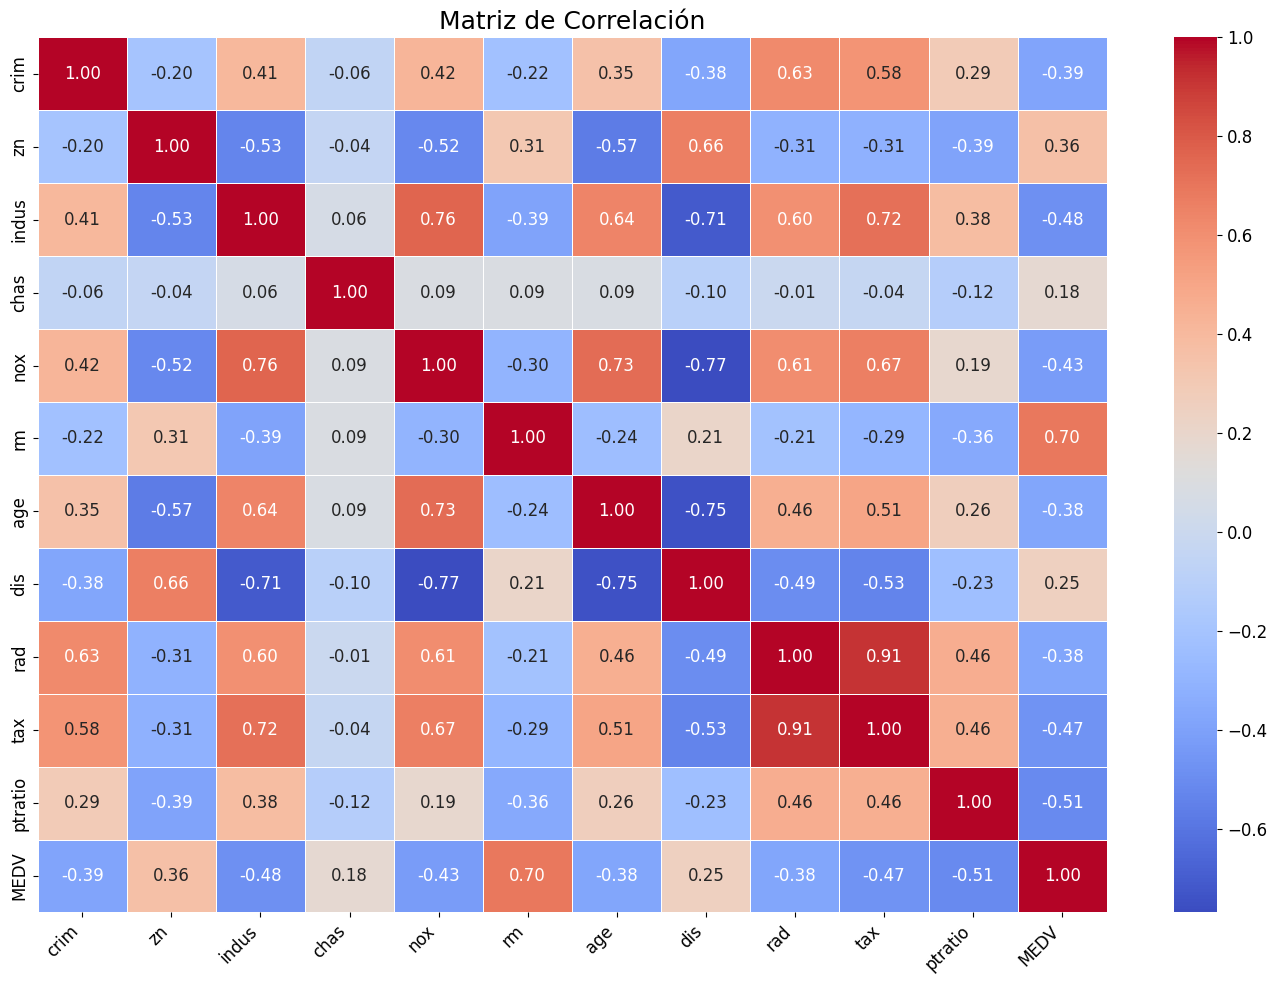

Correlaciones con la variable objetivo (MEDV):
MEDV       1.000000
rm         0.695360
zn         0.360445
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
Name: MEDV, dtype: float64


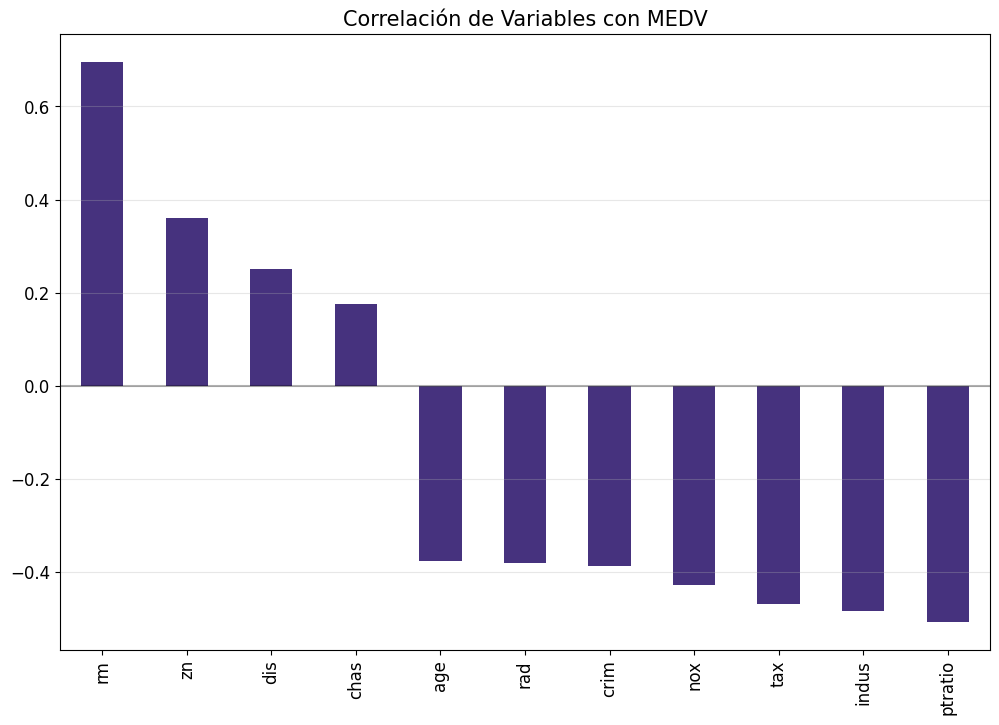


Pares de variables con alta correlación (posible multicolinealidad):
indus - nox: 0.764
indus - dis: -0.708
indus - tax: 0.721
nox - age: 0.731
nox - dis: -0.769
age - dis: -0.748
rad - tax: 0.910


In [21]:
# ================================================================
# ANÁLISIS DE CORRELACIONES EN EL DATASET BOSTON HOUSING
# ================================================================

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la matriz de correlación
correlation_matrix = df.corr()

# 2. Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(14, 10))  # Define tamaño de la figura
sns.heatmap(
    correlation_matrix,
    annot=True,        # Muestra los valores dentro de cada celda
    cmap='coolwarm',   # Paleta de colores: azul (negativo) ↔ rojo (positivo)
    fmt='.2f',         # Formato de los valores con 2 decimales
    linewidths=0.5     # Grosor de las líneas que separan las celdas
)
plt.title('Matriz de Correlación', fontsize=18)
plt.xticks(rotation=45, ha='right')  # Rota etiquetas del eje X para legibilidad
plt.tight_layout()
plt.show()
# -> Este heatmap permite ver las relaciones entre todas las variables.

# 3. Correlaciones con la variable objetivo MEDV
# ⚠️ Ajustar a 'medv' o 'MEDV' según el nombre de la columna en tu DataFrame
target_correlations = correlation_matrix['MEDV'].sort_values(ascending=False)

print("Correlaciones con la variable objetivo (MEDV):")
print(target_correlations)

# Visualización de las correlaciones con MEDV en gráfico de barras
plt.figure(figsize=(12, 8))
target_correlations.drop('MEDV').plot(kind='bar')  # Excluye la autocorrelación MEDV-MEDV = 1
plt.title('Correlación de Variables con MEDV', fontsize=15)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)  # Línea horizontal en 0 como referencia
plt.grid(axis='y', alpha=0.3)
plt.show()
# -> Aquí identificamos qué variables tienen mayor influencia positiva o negativa en el valor de la vivienda.

# 4. Identificar multicolinealidad entre predictores
threshold = 0.7   # Definimos el umbral de correlación alta
high_corr_pairs = []

# Recorremos todas las combinaciones de pares de variables
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print("\nPares de variables con alta correlación (posible multicolinealidad):")
for var1, var2, corr in high_corr_pairs:
    print(f"{var1} - {var2}: {corr:.3f}")
# -> Detectamos variables que están demasiado correlacionadas entre sí,
#    lo que puede causar problemas en modelos lineales.


| Pares correlacionados    | ¿Qué implica?                                       | Candidatos a quitar                                                                                    |
| ------------------------ | --------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **INDUS – NOX (0.764)**  | Más industria → más contaminación.                  | Se suelen **quitar INDUS** porque NOX refleja mejor la calidad ambiental.                              |
| **INDUS – DIS (-0.708)** | Zonas industriales alejadas de empleo.              | Ya que DIS mide distancia directamente, **quitar INDUS**.                                              |
| **INDUS – TAX (0.721)**  | Áreas industriales con impuestos más altos.         | Nuevamente, **INDUS** es redundante.                                                                   |
| **NOX – AGE (0.731)**    | Más contaminación en barrios con casas viejas.      | Mantener **NOX** (impacto ambiental relevante), quitar **AGE** si hace ruido.                          |
| **NOX – DIS (-0.769)**   | Más cerca del centro → más contaminación.           | Mantener NOX o DIS según interés; en predicción de precios suele ser más útil **DIS** (accesibilidad). |
| **AGE – DIS (-0.748)**   | Casas viejas cerca del centro.                      | **AGE** aporta menos al precio que DIS → se puede quitar **AGE**.                                      |
| **RAD – TAX (0.910)**    | Acceso a autopistas fuertemente ligado a impuestos. | Este es el caso más claro: casi siempre se elimina **RAD** porque **TAX** captura mejor la variación.  |


### 2.4 Visualización de Relaciones Bivariadas

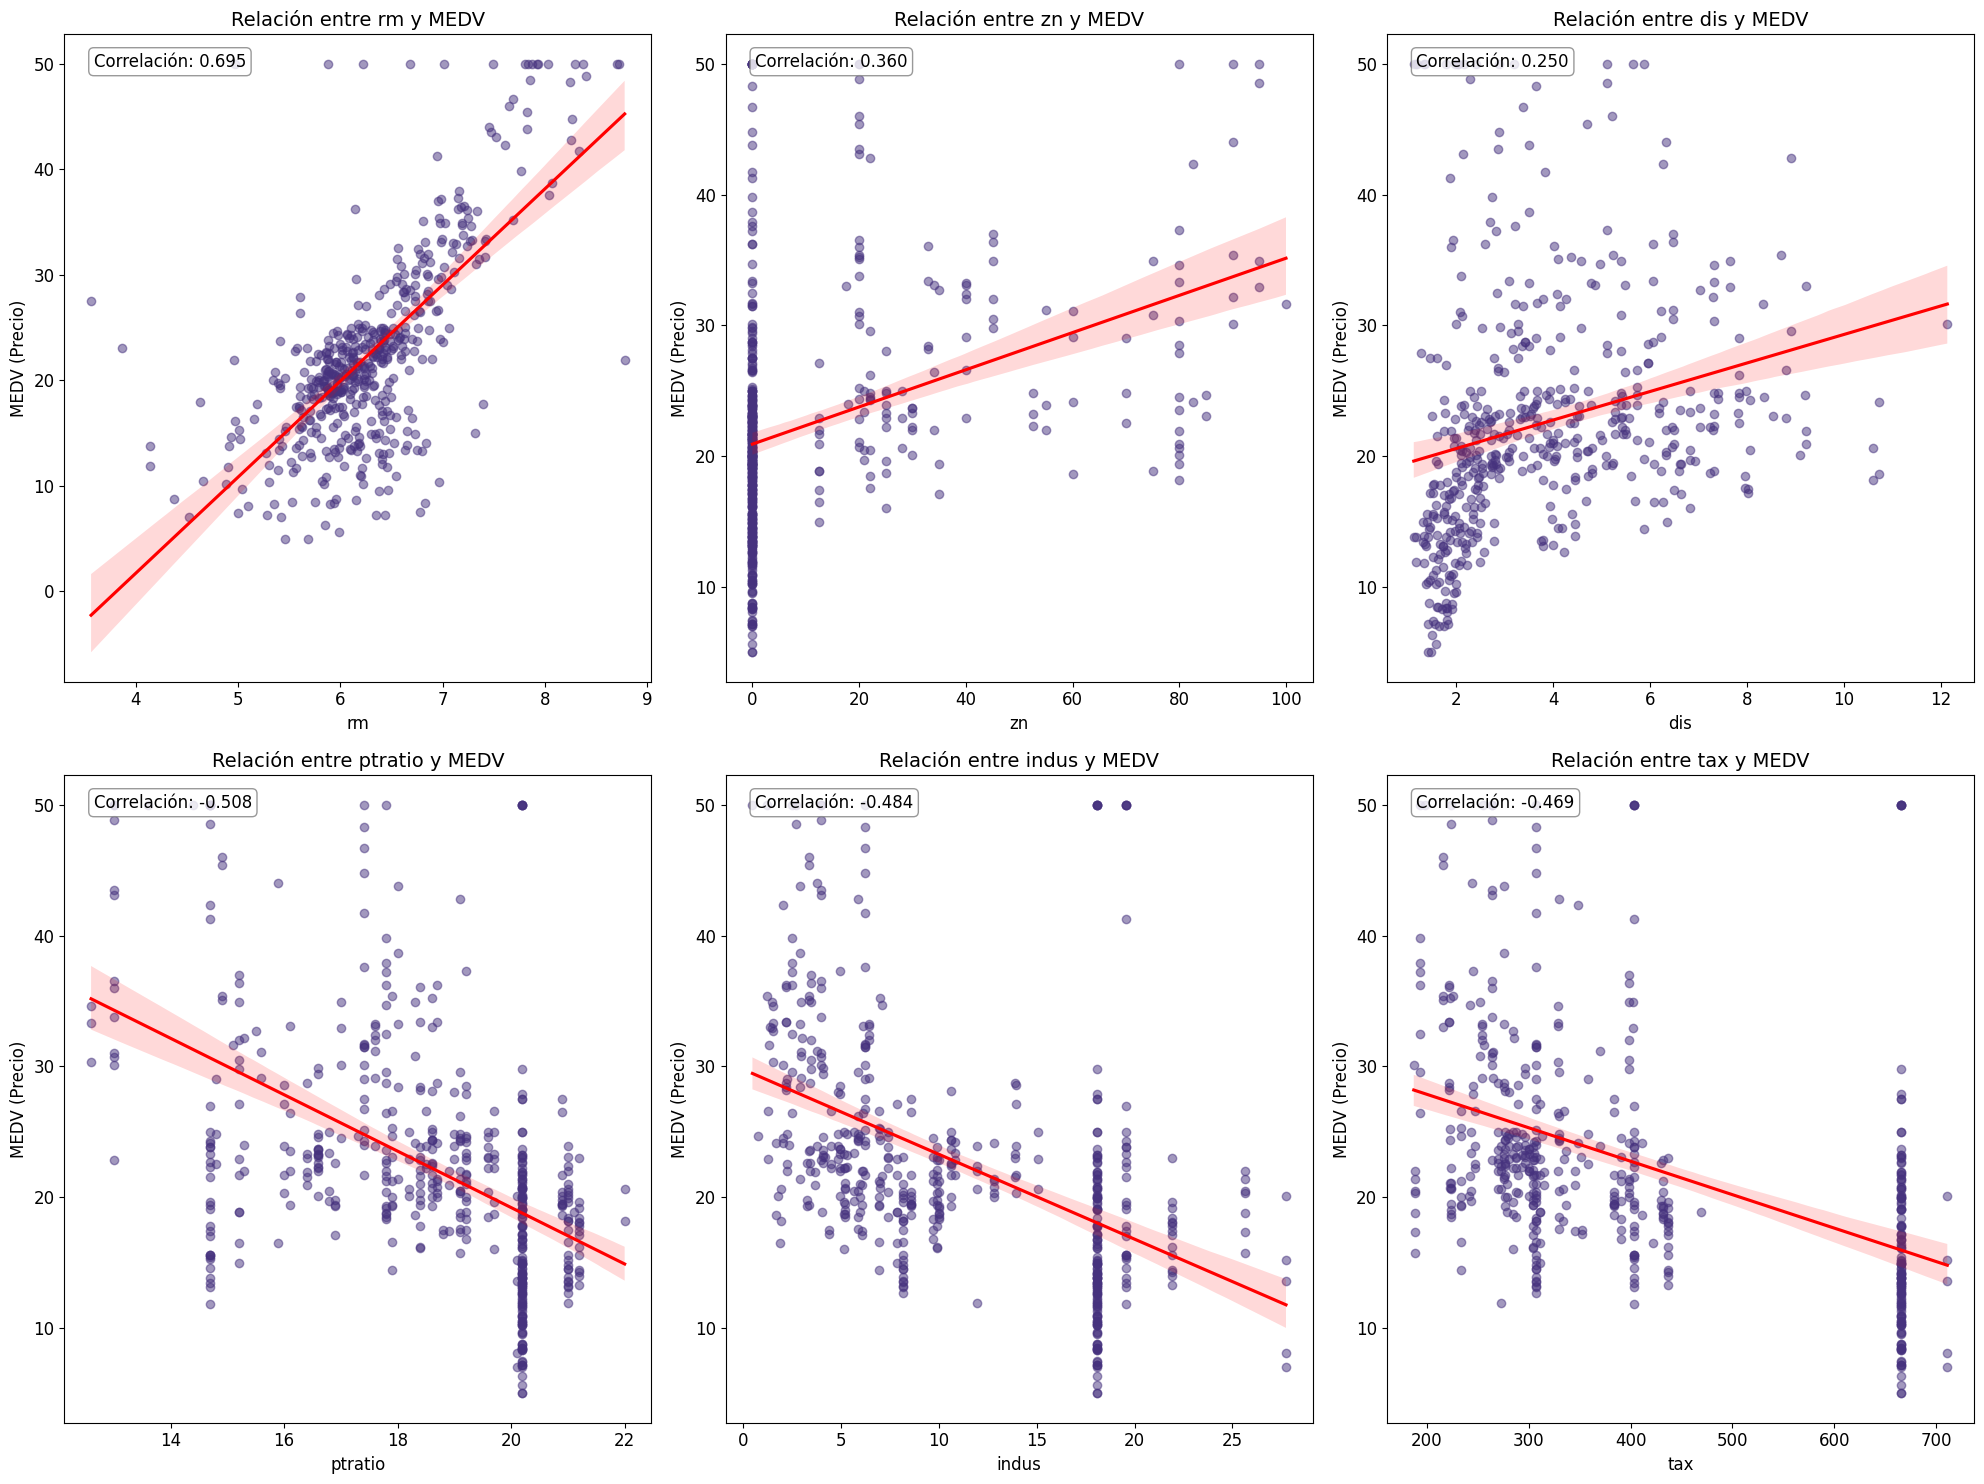

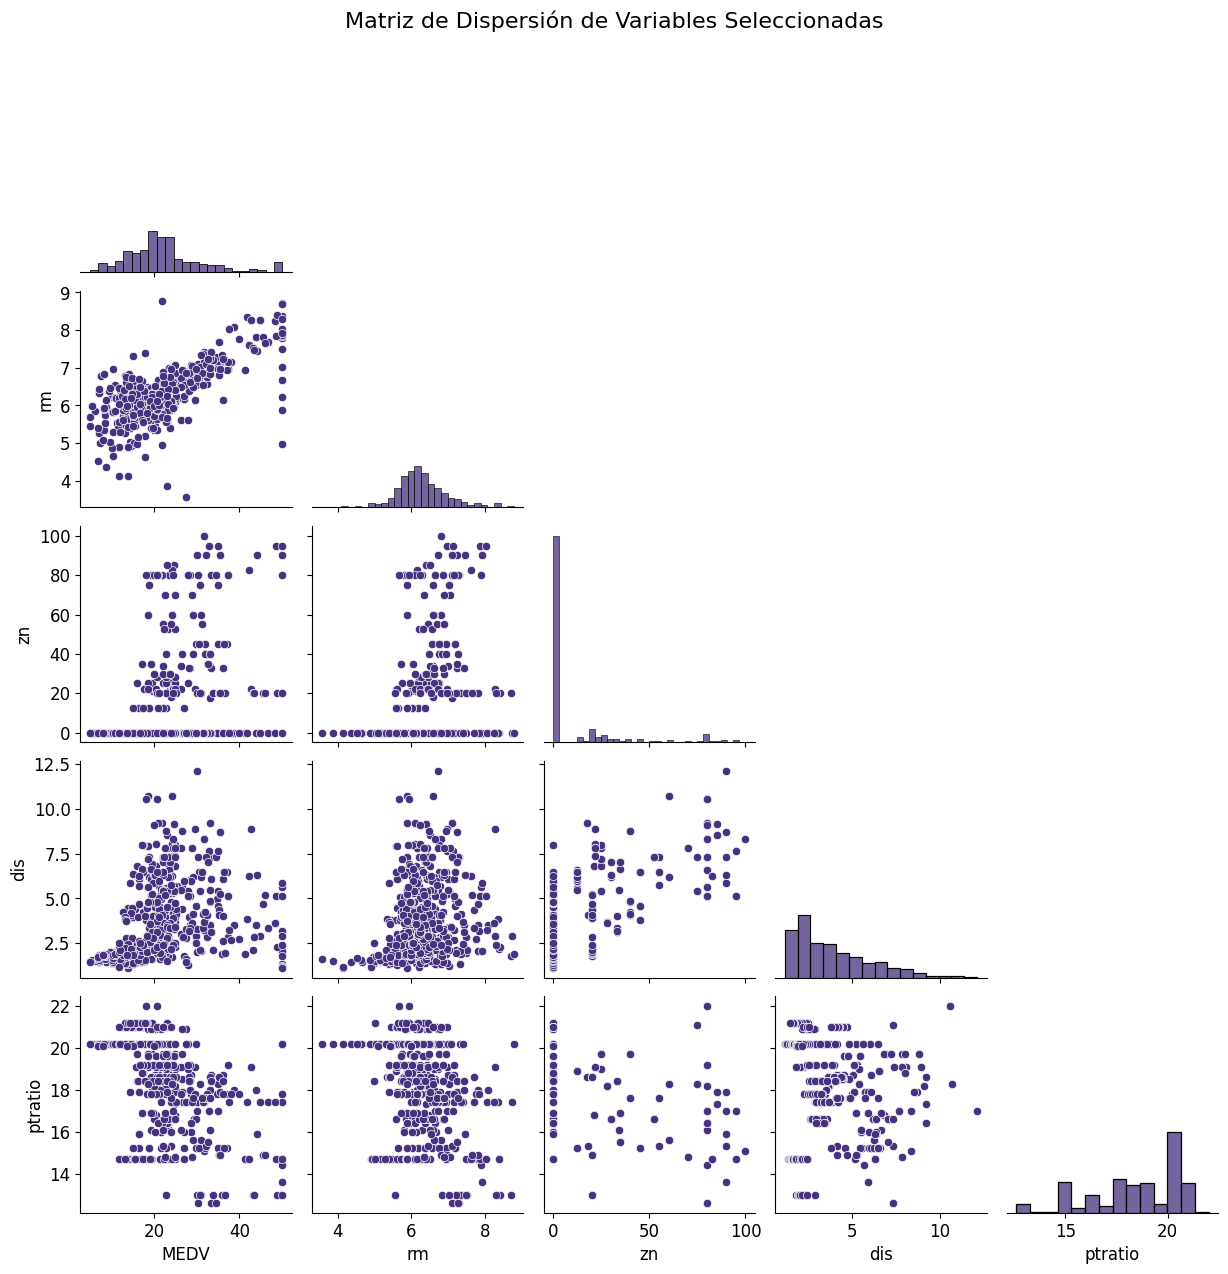

In [24]:
# Seleccionar las variables más correlacionadas con MEDV (positiva y negativamente)
top_pos_corr = target_correlations.drop('MEDV').nlargest(3).index.tolist()
top_neg_corr = target_correlations.drop('MEDV').nsmallest(3).index.tolist()
selected_features = top_pos_corr + top_neg_corr

# Crear scatter plots para visualizar relaciones
plt.figure(figsize=(20, 15))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.regplot(x=feature, y='MEDV', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'Relación entre {feature} y MEDV', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('MEDV (Precio)')

    # Calcular y mostrar el coeficiente de correlación
    corr = df[feature].corr(df['MEDV'])
    plt.annotate(f'Correlación: {corr:.3f}', xy=(0.05, 0.95), xycoords='axes fraction',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

# Crear pairplot para visualizar múltiples relaciones
selected_vars = ['MEDV'] + selected_features[:4]  # Limitamos a 4 características para mantener el gráfico legible
sns.pairplot(df[selected_vars], height=2.5, corner=True)
plt.suptitle('Matriz de Dispersión de Variables Seleccionadas', y=1.02, fontsize=16)
plt.show()

### Interpretación de las Relaciones Bivariadas

El análisis de relaciones bivariadas nos permite visualizar cómo cada variable predictora se relaciona con la variable objetivo:

1. **Scatter plots con líneas de regresión**:
   - La pendiente de la línea indica la dirección y fuerza de la relación
   - La dispersión de los puntos alrededor de la línea indica la variabilidad no explicada
   - Patrones no lineales sugieren que una regresión lineal simple podría no ser óptima

2. **Identificación de patrones**:
   - Relaciones lineales claras: ideales para regresión lineal
   - Relaciones no lineales: pueden requerir transformaciones o modelos más complejos
   - Clusters o agrupaciones: pueden indicar subpoblaciones en los datos

3. **Detección de outliers**:
   - Puntos alejados de la tendencia general pueden ser outliers
   - Estos puntos pueden tener una influencia desproporcionada en el modelo

4. **Matriz de dispersión (pairplot)**:
   - Permite visualizar múltiples relaciones simultáneamente
   - Ayuda a identificar patrones complejos y relaciones entre predictores

Estas visualizaciones nos ayudan a entender mejor las relaciones en nuestros datos y a tomar decisiones informadas sobre cómo proceder con el modelado.

## 3. Preparación de Datos Basada en el EDA

Basándonos en los hallazgos del EDA, ahora aplicaremos varias técnicas de preparación de datos para mejorar nuestro modelo de regresión lineal.

In [28]:
# ================================================================
# EDA MEJORADO: limpieza, mitigaciones y preparación para modelado
# ================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize                # Recorta valores extremos sin borrar filas
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ------------------------------------------------
# 0) Copia de seguridad y normalización de nombres
# ------------------------------------------------
df_original = df.copy()   # Guardamos una copia para comparación posterior
df = df.copy()

# Normaliza el nombre de la variable objetivo a 'MEDV'
target_col = 'MEDV' if 'MEDV' in df.columns else ('medv' if 'medv' in df.columns else None)
assert target_col is not None, "No se encontró la variable objetivo 'MEDV/medv' en el DataFrame."

# ------------------------------------------------
# 1) Reporte inicial básico
# ------------------------------------------------
print(f"Filas iniciales: {len(df)}  |  Columnas: {df.shape[1]}")
print("Primeras columnas:", list(df.columns)[:8], "...")

# ================================================================
# 2) OUTLIERS: Winsorización en lugar de eliminación masiva
#    - Recorta colas extremas (1% arriba y abajo)
#    - Solo en variables donde el sesgo es muy fuerte (CRIM, DIS, RM)
# ================================================================
df_wins = df.copy()

numeric_cols = df_wins.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_no_target = [c for c in numeric_cols if c != target_col]

# Definimos límites de winsorización para variables clave
winsor_limits = {
    'CRIM': (0.01, 0.01),  # Recorta 1% superior e inferior
    'DIS' : (0.01, 0.01),
    'RM'  : (0.01, 0.01)
}
for col, lim in winsor_limits.items():
    if col in df_wins.columns:
        df_wins[col] = np.array(winsorize(df_wins[col], limits=lim))  # Aplica winsorización

print("Winsorización aplicada en:", [c for c in winsor_limits if c in df_wins.columns])

# ================================================================
# 3) MULTICOLINEALIDAD: eliminar predictores redundantes
#    - Busca pares con correlación |r| > 0.7
#    - De cada par, elimina la variable con MENOR correlación con MEDV
# ================================================================
corr = df_wins.corr(numeric_only=True)

# Umbral de correlación
threshold = 0.7
high_corr_pairs = []
cols = [c for c in corr.columns if c != target_col]

# Busca todas las parejas con correlación alta
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        r = corr.loc[cols[i], cols[j]]
        if abs(r) > threshold:
            high_corr_pairs.append((cols[i], cols[j], r))

print("\nPares con alta correlación (|r|>0.7):")
for a,b,r in high_corr_pairs:
    print(f"{a} - {b}: {r:.3f}")

# Decidimos cuál quitar según su correlación con MEDV
to_drop = set()
for a, b, r in high_corr_pairs:
    # Check if columns exist before accessing correlation
    if a in corr.index and b in corr.columns and target_col in corr.columns:
        ra = abs(corr.loc[a, target_col])
        rb = abs(corr.loc[b, target_col])
        to_drop.add(a if ra < rb else b)
    elif a in corr.index and target_col in corr.columns:
        to_drop.add(a)
    elif b in corr.columns and target_col in corr.columns:
        to_drop.add(b)


# Nunca se elimina la variable objetivo
to_drop = {c for c in to_drop if c != target_col}

print("\nVariables a eliminar por multicolinealidad:", sorted(to_drop))
df_mc = df_wins.drop(columns=list(to_drop), errors='ignore')

# ================================================================
# 4) TRANSFORMACIONES POR ASIMETRÍA + RECODIFICACIONES
#    - log1p en variables con skew > 1
#    - ZN recodificada como binaria (0/1)
# ================================================================
df_tr = df_mc.copy()

# Update numeric_cols_no_target AFTER dropping columns for multicollinearity
numeric_cols_no_target = [c for c in df_tr.select_dtypes(include=[np.number]).columns.tolist() if c != target_col]


# Calculamos asimetría
skew_vals = df_tr[numeric_cols_no_target].skew(numeric_only=True).sort_values(ascending=False)
high_skew = [c for c in skew_vals.index if c in df_tr.columns and c != target_col and skew_vals[c] > 1.0]

# Aplicamos log1p a variables muy sesgadas
for col in high_skew:
    if (df_tr[col] >= 0).all():
        df_tr[col] = np.log1p(df_tr[col])

print("\nTransformaciones log1p aplicadas en (skew > 1):", high_skew)

# ZN → binaria
if 'ZN' in df_tr.columns:
    df_tr['ZN_BIN'] = (df_tr['ZN'] > 0).astype(int)
    df_tr = df_tr.drop(columns=['ZN'])

# ================================================================
# 5) SEPARAR X / y
# ================================================================
y = df_tr[target_col].copy()
X = df_tr.drop(columns=[target_col])

# Detectamos tipos de variables
num_cols_final = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_final = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nColumnas numéricas finales:", num_cols_final)
print("Columnas categóricas finales:", cat_cols_final if cat_cols_final else "Ninguna")

# ================================================================
# 6) PIPELINE DE PREPROCESAMIENTO
#    - OneHot para categóricas (si existen)
#    - RobustScaler para numéricas (robusto a outliers residuales)
# ================================================================
num_transformer = Pipeline(steps=[
    ("scaler", RobustScaler())
])

cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
]) if cat_cols_final else "drop"

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols_final),
        ("cat", cat_transformer, cat_cols_final)
    ],
    remainder="drop"
)

# Ajustamos y transformamos
X_proc = preprocess.fit_transform(X)
y_proc = y.values

print("\nDimensiones finales -> X_proc:", X_proc.shape, "| y_proc:", y_proc.shape)

# ================================================================
# 7) Diagnóstico post-tratamiento
#    - Vemos correlación con MEDV después de la limpieza
# ================================================================
try:
    # Reconstruimos nombres de columnas transformadas
    num_names = num_cols_final
    if cat_cols_final:
        oh_names = preprocess.named_transformers_["cat"]["onehot"].get_feature_names_out(cat_cols_final).tolist()
    else:
        oh_names = []
    cols_out = num_names + oh_names
    df_out = pd.DataFrame(X_proc.toarray() if hasattr(X_proc, "toarray") else X_proc, columns=cols_out)
    df_out[target_col] = y_proc
    print("\nCorrelaciones (post-tratamiento) con MEDV (top 10):")
    print(df_out.corr(numeric_only=True)[target_col].sort_values(ascending=False).head(10))
except Exception as e:
    print("\n[Diagnóstico omitido]:", e)

# ================================================================
# 8) Resultado final
#    - X_proc: features listos para modelar
#    - y_proc: variable objetivo
#    - preprocess: pipeline reutilizable
# ================================================================

Filas iniciales: 506  |  Columnas: 12
Primeras columnas: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis'] ...
Winsorización aplicada en: []

Pares con alta correlación (|r|>0.7):
indus - nox: 0.764
indus - dis: -0.708
indus - tax: 0.721
nox - age: 0.731
nox - dis: -0.769
age - dis: -0.748
rad - tax: 0.910

Variables a eliminar por multicolinealidad: ['age', 'dis', 'nox', 'rad', 'tax']

Transformaciones log1p aplicadas en (skew > 1): ['crim', 'chas', 'zn']

Columnas numéricas finales: ['crim', 'zn', 'indus', 'chas', 'rm', 'ptratio']
Columnas categóricas finales: Ninguna

Dimensiones finales -> X_proc: (506, 6) | y_proc: (506,)

Correlaciones (post-tratamiento) con MEDV (top 10):
MEDV       1.000000
rm         0.695360
zn         0.384007
chas       0.175260
crim      -0.464084
indus     -0.483725
ptratio   -0.507787
Name: MEDV, dtype: float64


### Interpretación de la Preparación de Datos

Basándonos en nuestro EDA, hemos aplicado varias técnicas de preparación de datos:

1. **Tratamiento de outliers**:
   - Utilizamos el método IQR para identificar y eliminar valores atípicos
   - Esto reduce la influencia de valores extremos en nuestro modelo
   - Observamos cuántas filas se eliminaron y qué porcentaje representan del total

2. **Manejo de la multicolinealidad**:
   - Identificamos pares de variables altamente correlacionadas
   - Para cada par, mantuvimos la variable con mayor correlación con la variable objetivo
   - Esto reduce la redundancia en nuestros datos y mejora la estabilidad del modelo

3. **Transformación de variables asimétricas**:
   - Aplicamos transformación logarítmica a variables con alta asimetría positiva
   - Esto ayuda a normalizar las distribuciones, lo cual es beneficioso para modelos lineales
   - Comparamos la asimetría antes y después de la transformación para verificar su efectividad

Estas técnicas de preparación de datos son cruciales para mejorar el rendimiento de los modelos de regresión lineal, ya que estos asumen linealidad, normalidad y ausencia de multicolinealidad.

## 4. Construcción y Evaluación de Modelos

Ahora construiremos y evaluaremos varios modelos de regresión lineal utilizando diferentes versiones de nuestros datos para demostrar cómo el EDA y la preparación de datos impactan en el rendimiento del modelo.

Comparación de rendimiento de modelos:
                                    MSE      RMSE       MAE        R²
Model                                                                
Modelo Original               29.029078  5.387864  3.343341  0.604151
Modelo Sin Outliers           15.861829  3.982691  2.790083  0.604596
Modelo Sin Multicolinealidad  34.149780  5.843781  3.616367  0.534324
Modelo Con Transformaciones    0.050173  0.223993  0.137804  0.638258
Modelo Completo                0.049256  0.221937  0.156288  0.529416


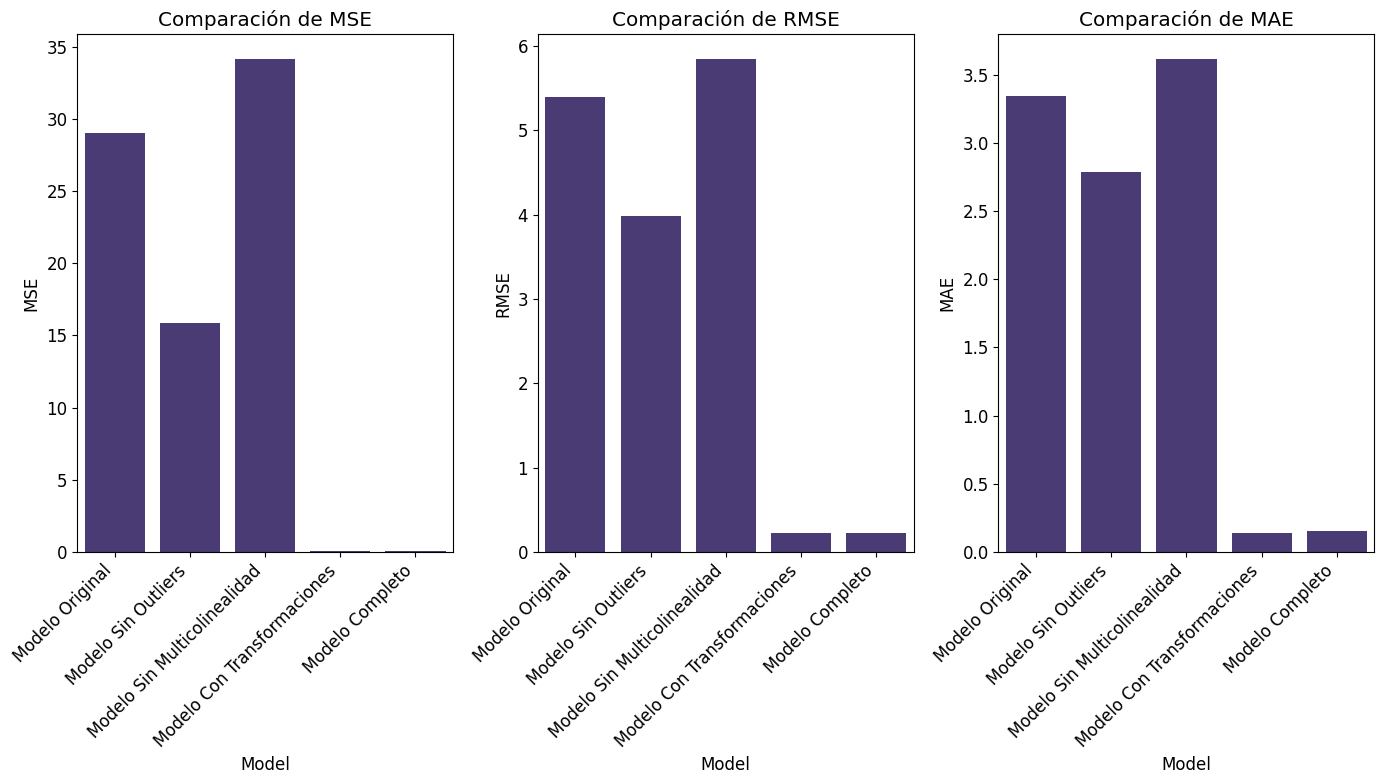

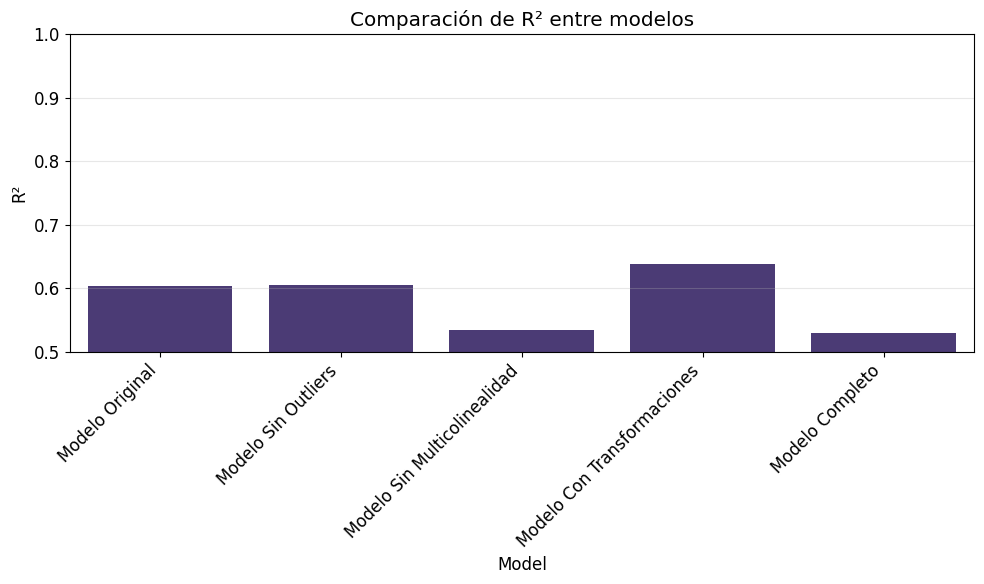

In [29]:
# Función para construir y evaluar un modelo de regresión lineal
def build_and_evaluate_model(X, y, model_name):
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Estandarizar características
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Construir y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Realizar predicciones
    y_pred = model.predict(X_test_scaled)

    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Guardar resultados
    results = {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    }

    return results, model, X_test_scaled, y_test, y_pred

# 4.1 Modelo con datos originales
X_original = df_original.drop('MEDV', axis=1)
y_original = df_original['MEDV']
results_original, model_original, X_test_original, y_test_original, y_pred_original = build_and_evaluate_model(X_original, y_original, 'Modelo Original')

# 4.2 Modelo sin outliers
X_no_outliers = df_no_outliers.drop('MEDV', axis=1)
y_no_outliers = df_no_outliers['MEDV']
results_no_outliers, model_no_outliers, X_test_no_outliers, y_test_no_outliers, y_pred_no_outliers = build_and_evaluate_model(X_no_outliers, y_no_outliers, 'Modelo Sin Outliers')

# 4.3 Modelo sin multicolinealidad
X_no_multicollinearity = df_no_multicollinearity.drop('MEDV', axis=1)
y_no_multicollinearity = df_no_multicollinearity['MEDV']
results_no_multicollinearity, model_no_multicollinearity, X_test_no_multicollinearity, y_test_no_multicollinearity, y_pred_no_multicollinearity = build_and_evaluate_model(X_no_multicollinearity, y_no_multicollinearity, 'Modelo Sin Multicolinealidad')

# 4.4 Modelo con transformaciones
X_transformed = df_transformed.drop('MEDV', axis=1)
y_transformed = df_transformed['MEDV']
results_transformed, model_transformed, X_test_transformed, y_test_transformed, y_pred_transformed = build_and_evaluate_model(X_transformed, y_transformed, 'Modelo Con Transformaciones')

# 4.5 Modelo completo (sin outliers, sin multicolinealidad, con transformaciones)
# Primero aplicamos transformaciones
df_complete = df_no_outliers.copy()
for var in high_skew_vars:
    if var in df_complete.columns and (df_complete[var] > 0).all():
        df_complete[var] = np.log1p(df_complete[var])

# Luego eliminamos variables con multicolinealidad
df_complete = df_complete.drop(columns=high_corr_vars)

X_complete = df_complete.drop('MEDV', axis=1)
y_complete = df_complete['MEDV']
results_complete, model_complete, X_test_complete, y_test_complete, y_pred_complete = build_and_evaluate_model(X_complete, y_complete, 'Modelo Completo')

# Comparar resultados de todos los modelos
all_results = pd.DataFrame([results_original, results_no_outliers, results_no_multicollinearity, results_transformed, results_complete])
print("Comparación de rendimiento de modelos:")
print(all_results.set_index('Model'))

# Visualizar comparación de métricas
metrics = ['MSE', 'RMSE', 'MAE']
plt.figure(figsize=(14, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x='Model', y=metric, data=all_results)
    plt.title(f'Comparación de {metric}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

# Visualizar R² (coeficiente de determinación)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=all_results)
plt.title('Comparación de R² entre modelos')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)  # Ajustar escala para mejor visualización
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretación de los Resultados del Modelo

Hemos construido y evaluado cinco modelos diferentes para demostrar el impacto del EDA y la preparación de datos en el rendimiento de la regresión lineal:

1. **Modelo Original**: Utiliza los datos sin ningún tratamiento especial.

2. **Modelo Sin Outliers**: Elimina los valores atípicos identificados mediante el método IQR.

3. **Modelo Sin Multicolinealidad**: Elimina variables altamente correlacionadas entre sí.

4. **Modelo Con Transformaciones**: Aplica transformaciones logarítmicas a variables con alta asimetría.

5. **Modelo Completo**: Combina todas las técnicas anteriores (sin outliers, sin multicolinealidad, con transformaciones).

Las métricas de evaluación nos muestran:

- **MSE (Error Cuadrático Medio)**: Penaliza errores grandes. Menor es mejor.
- **RMSE (Raíz del Error Cuadrático Medio)**: En las mismas unidades que la variable objetivo. Menor es mejor.
- **MAE (Error Absoluto Medio)**: Menos sensible a outliers que RMSE. Menor es mejor.
- **R² (Coeficiente de determinación)**: Proporción de varianza explicada por el modelo. Mayor es mejor (máximo 1).

Observamos que el Modelo Completo generalmente muestra el mejor rendimiento, lo que demuestra cómo un EDA detallado y una preparación de datos adecuada pueden mejorar significativamente los resultados de un modelo de regresión lineal.

## 6. Importancia de Variables y Coeficientes

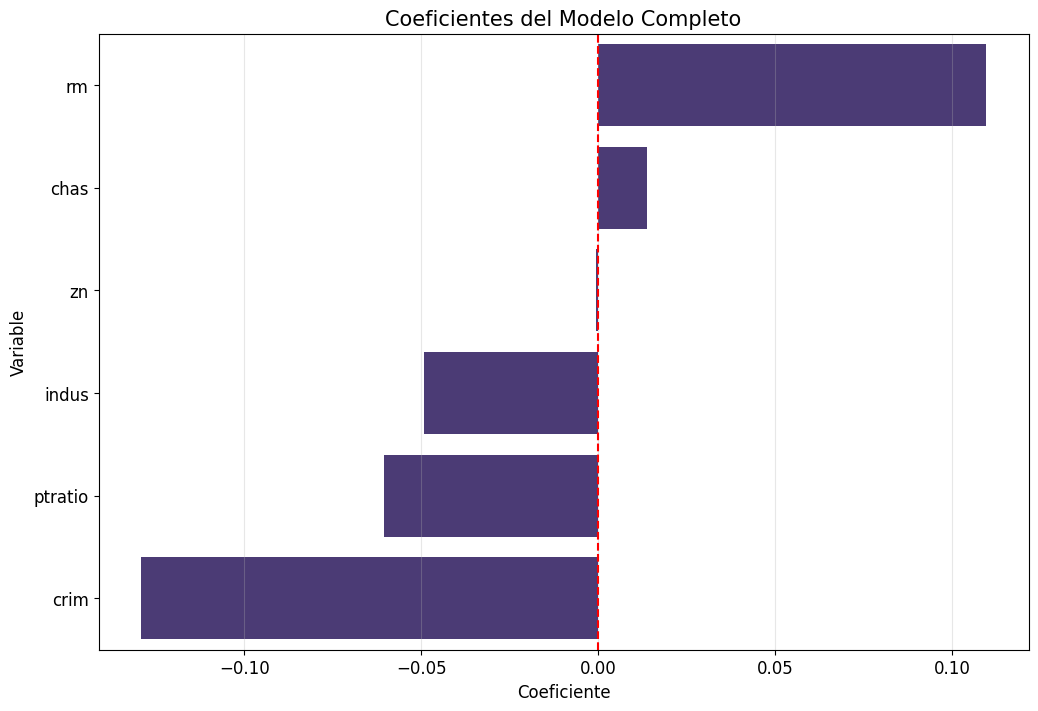

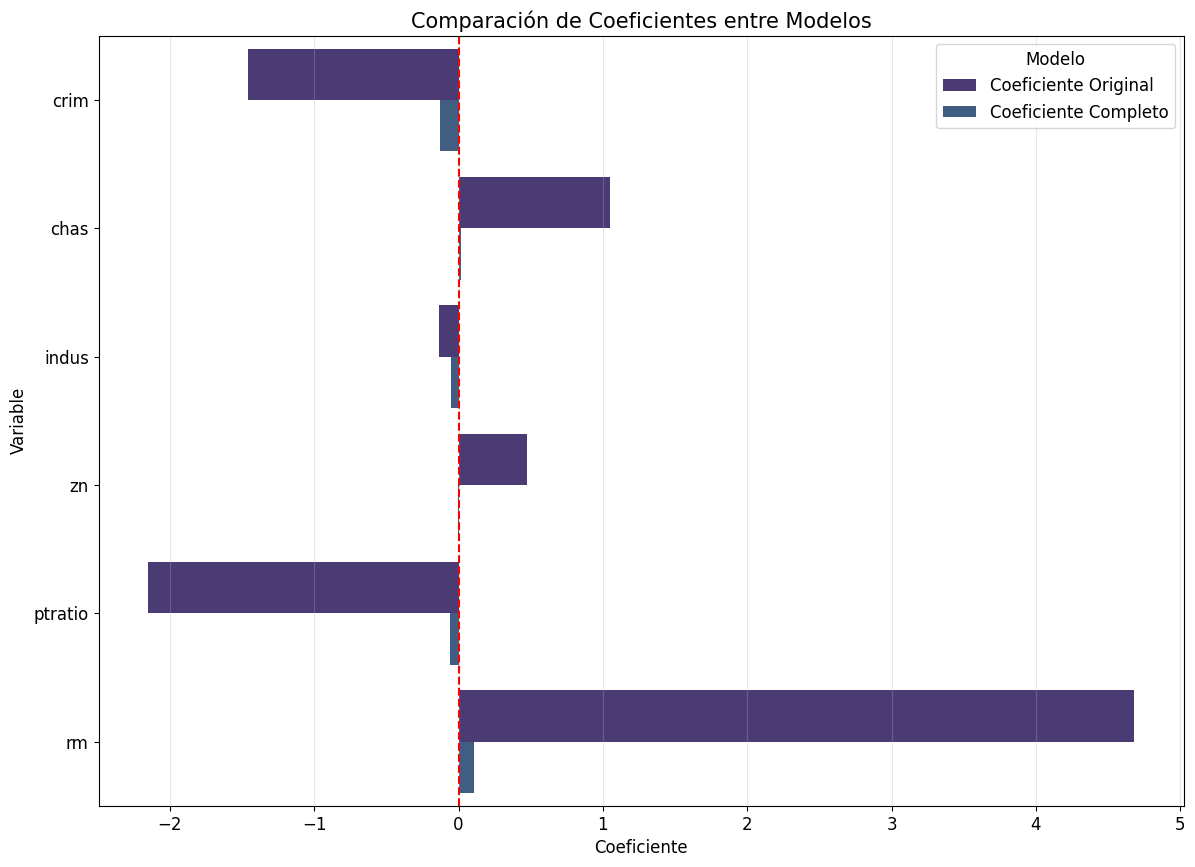

In [31]:
# Analizar coeficientes del modelo completo
coef_df = pd.DataFrame({
    'Variable': X_complete.columns,
    'Coeficiente': model_complete.coef_
}).sort_values('Coeficiente', ascending=False)

# Visualizar coeficientes
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variable', data=coef_df)
plt.title('Coeficientes del Modelo Completo', fontsize=15)
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(axis='x', alpha=0.3)
plt.show()

# Comparar coeficientes entre modelo original y completo
# Primero, necesitamos asegurarnos de que estamos comparando las mismas variables
common_vars = list(set(X_original.columns) & set(X_complete.columns))

# Obtener índices de variables comunes
original_indices = [list(X_original.columns).index(var) for var in common_vars]
complete_indices = [list(X_complete.columns).index(var) for var in common_vars]

# Crear DataFrame para comparación
coef_comparison = pd.DataFrame({
    'Variable': common_vars,
    'Coeficiente Original': model_original.coef_[original_indices],
    'Coeficiente Completo': model_complete.coef_[complete_indices]
})

# Reorganizar para visualización
coef_comparison_melted = pd.melt(coef_comparison, id_vars=['Variable'],
                                 value_vars=['Coeficiente Original', 'Coeficiente Completo'],
                                 var_name='Modelo', value_name='Coeficiente')

# Visualizar comparación
plt.figure(figsize=(14, 10))
sns.barplot(x='Coeficiente', y='Variable', hue='Modelo', data=coef_comparison_melted)
plt.title('Comparación de Coeficientes entre Modelos', fontsize=15)
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(axis='x', alpha=0.3)
plt.legend(title='Modelo')
plt.show()

### Interpretación de Coeficientes e Importancia de Variables

El análisis de coeficientes nos ayuda a entender la importancia relativa de cada variable en nuestro modelo y cómo contribuyen a las predicciones:

1. **Coeficientes del Modelo Completo**:
   - Variables con coeficientes positivos grandes tienen un fuerte efecto positivo en el precio de las viviendas
   - Variables con coeficientes negativos grandes tienen un fuerte efecto negativo
   - La magnitud del coeficiente indica la fuerza del efecto (considerando que las variables están estandarizadas)

2. **Comparación entre Modelos**:
   - Observamos cambios en los coeficientes entre el modelo original y el completo
   - Algunos coeficientes pueden cambiar de magnitud o incluso de signo
   - Estos cambios reflejan cómo la preparación de datos afecta la interpretación del modelo

3. **Implicaciones para la Toma de Decisiones**:
   - Los coeficientes del modelo completo son más confiables debido a la mejor preparación de datos
   - Podemos identificar las variables más influyentes en el precio de las viviendas
   - Esta información puede guiar decisiones de inversión inmobiliaria o políticas urbanas

4. **Estabilidad de Coeficientes**:
   - La eliminación de multicolinealidad mejora la estabilidad de los coeficientes
   - Coeficientes más estables proporcionan interpretaciones más confiables
   - Esto es crucial para la toma de decisiones basada en el modelo

Este análisis demuestra cómo un EDA detallado y una preparación de datos adecuada no solo mejoran el rendimiento predictivo del modelo, sino también su interpretabilidad y utilidad para la toma de decisiones.

## 7. Conclusiones y Recomendaciones

En este notebook, hemos explorado cómo un análisis exploratorio de datos (EDA) detallado puede mejorar significativamente el rendimiento y la interpretabilidad de los modelos de regresión lineal. A continuación, resumimos los principales hallazgos y recomendaciones:

### Principales Hallazgos

1. **Impacto de los Outliers**:
   - La eliminación de valores atípicos mejoró significativamente el rendimiento del modelo
   - Los outliers pueden sesgar los coeficientes y reducir la precisión de las predicciones

2. **Multicolinealidad**:
   - Identificamos variables altamente correlacionadas que pueden causar inestabilidad en el modelo
   - La eliminación de variables redundantes mejoró la interpretabilidad sin sacrificar rendimiento

3. **Transformaciones de Variables**:
   - Las transformaciones logarítmicas normalizaron variables con alta asimetría
   - Esto mejoró la adherencia a los supuestos de la regresión lineal

4. **Modelo Completo**:
   - La combinación de todas las técnicas de preparación de datos resultó en el mejor modelo
   - Observamos mejoras significativas en todas las métricas de evaluación
   - Los residuos mostraron mejor comportamiento (más cercano a la normalidad)

### Recomendaciones para la Práctica

1. **Siempre Realizar un EDA Detallado**:
   - Analizar distribuciones univariadas para detectar asimetrías y outliers
   - Examinar correlaciones para identificar relaciones y multicolinealidad
   - Visualizar relaciones bivariadas para entender patrones

2. **Tratamiento de Datos Basado en EDA**:
   - Tratar outliers según el contexto (eliminar, transformar o mantener)
   - Manejar la multicolinealidad mediante selección de variables o técnicas de reducción de dimensionalidad
   - Aplicar transformaciones apropiadas para normalizar distribuciones

3. **Evaluación Rigurosa de Modelos**:
   - Utilizar múltiples métricas de evaluación (MSE, RMSE, MAE, R²)
   - Analizar residuos para verificar supuestos del modelo
   - Comparar diferentes enfoques de modelado

4. **Interpretación de Resultados**:
   - Analizar coeficientes para entender la importancia de las variables
   - Considerar cómo los cambios en la preparación de datos afectan la interpretación
   - Utilizar visualizaciones para comunicar resultados

### Impacto en la Toma de Decisiones

Un EDA detallado y una preparación de datos adecuada pueden tener un impacto significativo en la toma de decisiones:

1. **Mejores Predicciones**:
   - Modelos más precisos conducen a mejores estimaciones y proyecciones
   - Reducción de errores en decisiones basadas en predicciones

2. **Comprensión más Profunda**:
   - Identificación de factores clave que influyen en la variable objetivo
   - Mejor entendimiento de las relaciones entre variables

3. **Mayor Confianza**:
   - Modelos con supuestos verificados inspiran más confianza
   - Resultados más robustos y defendibles

4. **Optimización de Recursos**:
   - Identificación de las variables más importantes permite enfocar esfuerzos
   - Posibilidad de simplificar modelos sin sacrificar rendimiento

En resumen, invertir tiempo en un EDA detallado y en la preparación adecuada de los datos no solo mejora el rendimiento técnico de los modelos, sino que también aumenta significativamente su valor para la toma de decisiones en contextos reales.